In [ ]:
#Multimodal models for processing all data which is preprocessed

In [71]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [72]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split

In [73]:
synth_df=pd.read_csv("nlpGendata.csv")


In [74]:
X=synth_df.values[:,:-1]
y=synth_df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [75]:
geo_X_train=X_train[:,0:4]
geo_X_test=X_test[:,0:4]
url_X_train=X_train[:,4:461]
url_X_test=X_test[:,4:461]
origurl_X_train=X_train[:,461:956]
origurl_X_test=X_test[:,461:956]
ancurl_X_train=X_train[:,956:1428]
ancurl_X_test=X_test[:,956:1428]
nlp_X_train=X_train[:,1428:1429]
nlp_X_test=X_test[:,1428:1429]

In [96]:
geo_input=keras.Input(shape=(4,),name='geo')
geo_x=layers.Dense(10,activation='sigmoid')(geo_input)
# geo_x=layers.Dense(16,activation='sigmoid')(geo_x)
geo_output=layers.Dense(1,activation='sigmoid')(geo_x)

In [97]:
url_input=keras.Input(shape=(457,),name='url') 
url_x=layers.Dense(500,activation='sigmoid')(url_input)
url_x=layers.Dense(50,activation='sigmoid')(url_x)
url_output=layers.Dense(1,activation='sigmoid')(url_x)

In [98]:
origurl_input=keras.Input(shape=(495,),name='origurl') 
origurl_x=layers.Dense(550,activation='sigmoid')(origurl_input)
# origurl_x=layers.Dense(55,activation='sigmoid')(origurl_x)
origurl_output=layers.Dense(1,activation='sigmoid')(origurl_x)

In [99]:
ancurl_input=keras.Input(shape=(472,),name='ancurl') 
ancurl_x=layers.Dense(550,activation='sigmoid')(ancurl_input)
# ancurl_x=layers.Dense(60,activation='sigmoid')(ancurl_x)
ancurl_output=layers.Dense(1,activation='sigmoid')(ancurl_x)

In [100]:
nlp_input=keras.Input(shape=(1,),name='nlp-score')
# nlp_output = nlp_input 
# alt_x=layers.Dense(64,activation='sigmoid')(alt_input)
# alt_x=layers.Dense(25,activation='sigmoid')(alt_x)
nlp_output=nlp_input

In [ ]:
# cap_input=keras.Input(shape=(19,),name='cap') 
# cap_x=layers.Dense(16,activation='sigmoid')(cap_input)
# cap_x=layers.Dense(8,activation='sigmoid')(cap_x)
# cap_output=layers.Dense(1,activation='sigmoid')(cap_x)

In [101]:
xf1=layers.concatenate([geo_output,url_output,origurl_output,ancurl_output,nlp_output])
xf1=layers.Dense(20,activation='sigmoid')(xf1)
result=layers.Dense(1, name="ad/nonad")(xf1)

In [102]:
model=keras.Model(inputs=[geo_input,url_input,origurl_input,ancurl_input,nlp_input],outputs=[result])

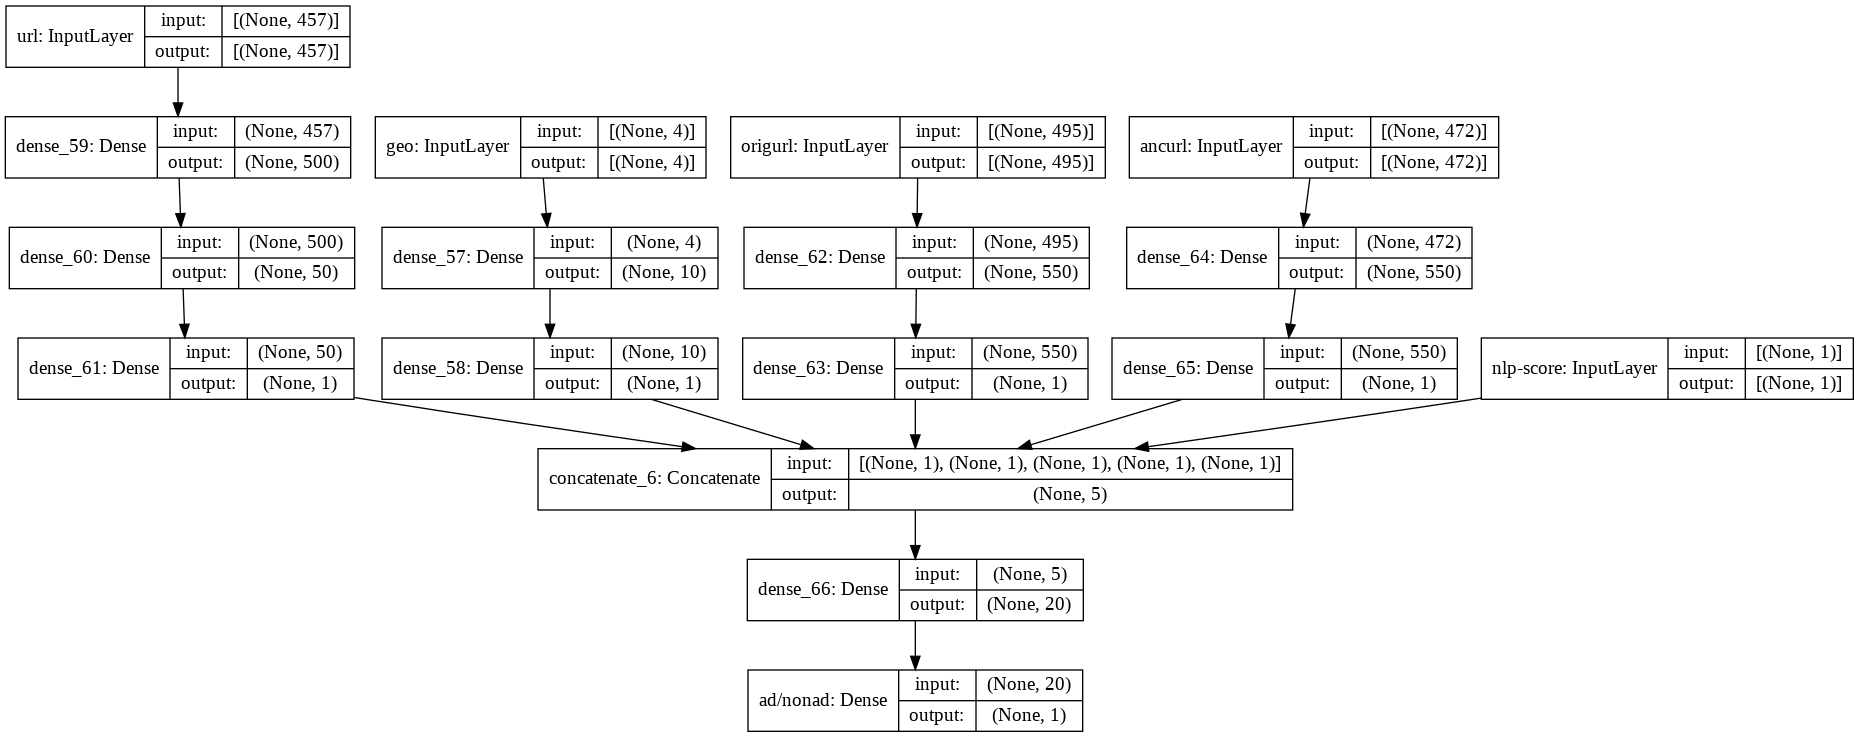

In [103]:
keras.utils.plot_model(model, "dbz_super_2.png", show_shapes=True)


In [104]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
url (InputLayer)                [(None, 457)]        0                                            
__________________________________________________________________________________________________
geo (InputLayer)                [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_59 (Dense)                (None, 500)          229000      url[0][0]                        
__________________________________________________________________________________________________
origurl (InputLayer)            [(None, 495)]        0                                            
____________________________________________________________________________________________

In [105]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        # keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    metrics=['accuracy'],
    
)

In [ ]:
s='geo_X_test'
print(s.replace("geo","geo"),",")
print(s.replace("geo","url"),",",)
print(s.replace("geo","origurl"),",",)
print(s.replace("geo","ancurl"),",",)
print(s.replace("geo","alt"),",",)
print(s.replace("geo","cap"),"",)

In [106]:
model.fit(
    {"geo": geo_X_train, "url": url_X_train ,
      "origurl": origurl_X_train ,
      "ancurl": ancurl_X_train ,
      "nlp-score": nlp_X_train },
    {"ad/nonad": y_train},
    epochs=200,
    batch_size=64,
    validation_split=0.125,
    verbose=1,

)

Epoch 1/200
45/45 [==============================] - 2s 17ms/step - loss: 0.7110 - accuracy: 0.3100 - val_loss: 0.6403 - val_accuracy: 0.3212
Epoch 2/200
45/45 [==============================] - 1s 12ms/step - loss: 0.6331 - accuracy: 0.4710 - val_loss: 0.6116 - val_accuracy: 0.8516
Epoch 3/200
45/45 [==============================] - 1s 12ms/step - loss: 0.6042 - accuracy: 0.7996 - val_loss: 0.5895 - val_accuracy: 0.8248
Epoch 4/200
45/45 [==============================] - 1s 12ms/step - loss: 0.5813 - accuracy: 0.8405 - val_loss: 0.5651 - val_accuracy: 0.8491
Epoch 5/200
45/45 [==============================] - 1s 11ms/step - loss: 0.5594 - accuracy: 0.8637 - val_loss: 0.5357 - val_accuracy: 0.8662
Epoch 6/200
45/45 [==============================] - 1s 12ms/step - loss: 0.5290 - accuracy: 0.8759 - val_loss: 0.5024 - val_accuracy: 0.8710
Epoch 7/200
45/45 [==============================] - 1s 12ms/step - loss: 0.4858 - accuracy: 0.8818 - val_loss: 0.4695 - val_accuracy: 0.8881
Epoch 

In [107]:
test_score= model.evaluate([geo_X_test ,
url_X_test ,
origurl_X_test ,
ancurl_X_test ,
nlp_X_test ],y_test,verbose=2)

26/26 - 0s - loss: 0.1310 - accuracy: 0.9562


In [91]:
model.save('dbz_super_1.h5')

In [ ]:
from keras.models import load_model
prevModel = load_model('nlp_model_5.h5')

In [ ]:
train_score= prevModel.evaluate([geo_X_train ,
url_X_train ,
origurl_X_train ,
ancurl_X_train ,
alt_X_train],y_train,verbose=1)
print(train_score)

test_score= prevModel.evaluate([geo_X_test ,
url_X_test ,
origurl_X_test ,
ancurl_X_test ,
alt_X_test ],y_test,verbose=2)
print(test_score)
# print('Test accuracy:', score[1])

# score = prevModel.evaluate(X_val,y_val, verbose=1)
# print(score)
# print('Validation accuracy:', score[1])

In [ ]:
prevModel.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
geo (InputLayer)                [(None, 4)]          0                                            
__________________________________________________________________________________________________
url (InputLayer)                [(None, 457)]        0                                            
__________________________________________________________________________________________________
origurl (InputLayer)            [(None, 495)]        0                                            
__________________________________________________________________________________________________
ancurl (InputLayer)             [(None, 472)]        0                                            
____________________________________________________________________________________________

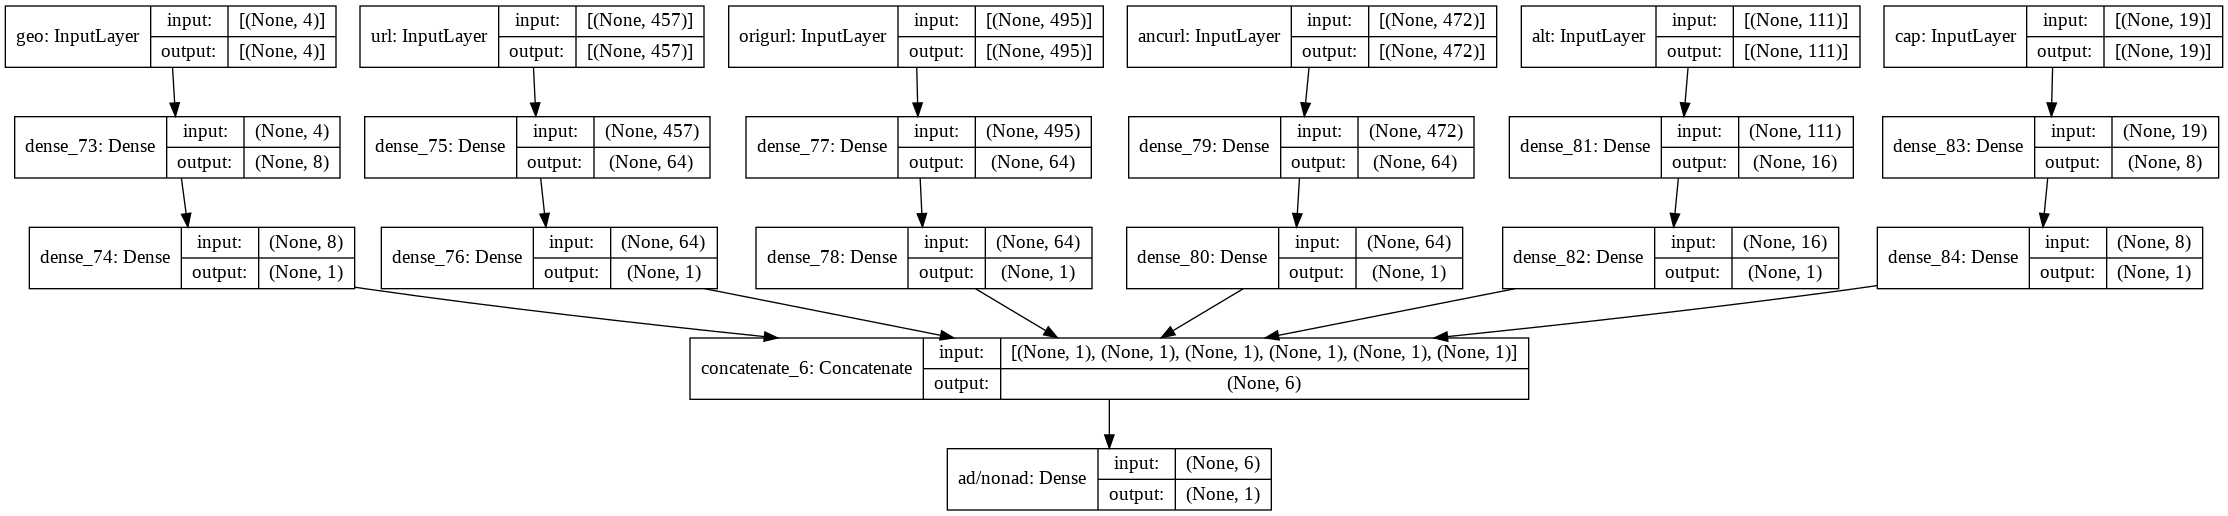

In [ ]:
keras.utils.plot_model(prevModel, "multiModal_zwei.png", show_shapes=True)


In [ ]:
# import matplotlib.pyplot as plt


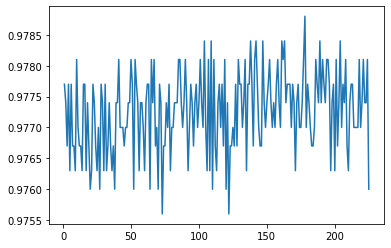

In [ ]:
# x=[0.9777, 0.9774, 0.9767, 0.9777, 0.9763, 0.9777, 0.9767, 0.9767, 0.9763, 0.9781, 0.977, 0.9767, 0.9767, 0.9763, 0.9777, 0.9777, 0.9763, 0.9774, 0.9767, 0.976, 0.9763, 0.9777, 0.9774, 0.9767, 0.9763, 0.977, 0.976, 0.9777, 0.9774, 0.9763, 0.9777, 0.9763, 0.9767, 0.9774, 0.9767, 0.9763, 0.9767, 0.976, 0.9774, 0.9774, 0.9781, 0.977, 0.977, 0.977, 0.9767, 0.977, 0.977, 0.9774, 0.9774, 0.9781, 0.9777, 0.976, 0.9781, 0.9777, 0.9774, 0.9763, 0.9774, 0.9774, 0.977, 0.9763, 0.9774, 0.9777, 0.9777, 0.976, 0.9781, 0.9774, 0.9781, 0.9767, 0.977, 0.976, 0.9777, 0.9774, 0.9756, 0.9767, 0.9767, 0.9774, 0.977, 0.9777, 0.9763, 0.977, 0.977, 0.9774, 0.9774, 0.9774, 0.9781, 0.9781, 0.9774, 0.977, 0.9774, 0.9781, 0.9774, 0.9763, 0.977, 0.9777, 0.9774, 0.9767, 0.9774, 0.9777, 0.977, 0.9774, 0.9781, 0.9774, 0.977, 0.9784, 0.977, 0.9763, 0.9781, 0.9763, 0.9784, 0.976, 0.9781, 0.9767, 0.9763, 0.9774, 0.9777, 0.977, 0.9777, 0.9767, 0.9781, 0.976, 0.9774, 0.9756, 0.9767, 0.9767, 0.977, 0.9767, 0.9777, 0.9767, 0.9781, 0.9777, 0.9777, 0.977, 0.9774, 0.9781, 0.9763, 0.9777, 0.9777, 0.9784, 0.9777, 0.9767, 0.9781, 0.9784, 0.9777, 0.977, 0.9767, 0.9767, 0.9784, 0.9774, 0.977, 0.9774, 0.9777, 0.9781, 0.9774, 0.977, 0.9774, 0.977, 0.9777, 0.9781, 0.9774, 0.977, 0.9784, 0.9781, 0.9784, 0.9774, 0.9777, 0.9777, 0.9777, 0.977, 0.9777, 0.9774, 0.9763, 0.9774, 0.9777, 0.977, 0.977, 0.9774, 0.9781, 0.9788, 0.977, 0.9777, 0.9774, 0.977, 0.9767, 0.9767, 0.977, 0.9781, 0.9777, 0.9774, 0.9784, 0.9774, 0.9781, 0.9777, 0.9774, 0.9781, 0.9781, 0.9777, 0.9763, 0.9774, 0.9777, 0.9763, 0.9781, 0.9767, 0.9774, 0.9784, 0.977, 0.9777, 0.9774, 0.9781, 0.9767, 0.9763, 0.9774, 0.9777, 0.9777, 0.977, 0.977, 0.977, 0.977, 0.9781, 0.977, 0.9774, 0.9781, 0.9774, 0.9774, 0.9781, 0.976]
# yy=[0.9805, 0.9781, 0.9732, 0.9757, 0.9781, 0.9732, 0.9781, 0.9805, 0.9757, 0.9732, 0.9781, 0.9757, 0.9805, 0.9732, 0.9757, 0.9732, 0.9781, 0.9732, 0.9732, 0.9805, 0.9805, 0.9781, 0.9757, 0.9757, 0.9781, 0.9781, 0.9757, 0.9757, 0.9805, 0.9805, 0.9684, 0.9757, 0.9732, 0.9781, 0.9781, 0.9708, 0.9757, 0.9757, 0.9805, 0.9805, 0.9805, 0.9781, 0.9732, 0.9781, 0.9757, 0.9732, 0.9805, 0.9708, 0.9781, 0.9757, 0.9684, 0.9781, 0.9757, 0.9781, 0.9781, 0.9805, 0.9805, 0.9805, 0.9781, 0.9781, 0.9805, 0.9805, 0.9684, 0.9757, 0.9757, 0.9781, 0.9781, 0.9757, 0.9684, 0.9757, 0.9781, 0.9757, 0.9781, 0.9781, 0.9732, 0.9732, 0.9781, 0.9757, 0.9805, 0.9805, 0.9757, 0.9757, 0.9781, 0.9781, 0.9757, 0.9732, 0.9757, 0.9781, 0.9781, 0.9757, 0.9805, 0.9757, 0.9805, 0.9781, 0.9757, 0.9805, 0.9708, 0.9805, 0.9805, 0.9757, 0.9757, 0.9805, 0.9805, 0.9757, 0.9805, 0.9805, 0.9732, 0.9805, 0.9805, 0.9781, 0.9781, 0.9781, 0.9781, 0.9757, 0.9805, 0.9805, 0.9781, 0.9781, 0.9781, 0.9781, 0.9708, 0.9781, 0.9805, 0.9805, 0.9757, 0.9805, 0.9805, 0.9805, 0.9805, 0.9805, 0.9805, 0.9805, 0.9805, 0.9757, 0.9805, 0.9757, 0.9781, 0.9781, 0.9757, 0.9781, 0.9805, 0.9781, 0.9781, 0.9732, 0.9781, 0.9805, 0.9659, 0.9805, 0.9708, 0.9781, 0.9708, 0.9781, 0.9781, 0.9805, 0.9805, 0.9805, 0.9781, 0.9781, 0.9805, 0.9781, 0.9757, 0.9805, 0.9781, 0.9805, 0.9781, 0.9757, 0.9757, 0.9805, 0.9805, 0.9805, 0.9781, 0.9805, 0.9805, 0.9781, 0.9781, 0.9781, 0.9781, 0.9781, 0.9781, 0.9781, 0.9805, 0.9781, 0.9805, 0.9805, 0.9781, 0.9781, 0.9757, 0.9805, 0.9757, 0.9781, 0.9805, 0.9781, 0.9781, 0.9805, 0.9781, 0.9732, 0.9781, 0.9781, 0.9805, 0.9781, 0.9781, 0.9805, 0.9781, 0.9781, 0.9781, 0.9757, 0.9805, 0.9781, 0.9781, 0.9805, 0.9781, 0.9805, 0.9781, 0.9805, 0.9781, 0.9781, 0.9805, 0.9805, 0.9805, 0.9781, 0.9781, 0.9757, 0.9805, 0.9781, 0.9781]
# rr=range(1,226)
# # plt.plot(rr,yy)
# plt.plot(rr,x)